# Amazon Location Coupon
## Overview
Using survey data from Amazon Mechanical Turk, this analysis provide insight into what type of customer under what circumstances are more likely to accept certain type of coupons

## Data description
### User attributes
-  Gender: male, female
-  Age: below 21, 21 to 25, 26 to 30, etc.
-  Marital Status: single, married partner, unmarried partner, or widowed
-  Number of children: 0, 1, or more than 1
-  Education: high school, bachelors degree, associates degree, or graduate degree
-  Occupation: architecture & engineering, business & financial, etc.
-  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
-  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
-  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
than 8
-  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
greater than 8
-  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
-  Number of times that he/she eats at a restaurant with average expense between $20 to $50 per
person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

### Contextual attributes
- Driving destination: home, work, or no urgent destination
- Location of user, coupon and destination: we provide a map to show the geographical
location of the user, destination, and the venue, and we mark the distance between each
two places with time of driving. The user can see whether the venue is in the same
direction as the destination.
- Weather: sunny, rainy, or snowy
- Temperature: 30F, 55F, or 80F
- Time: 10AM, 2PM, or 6PM
- Passenger: alone, partner, kid(s), or friend(s)
- Type of car

### Coupon attributes
- time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/coupons.csv')

#### Sample data

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
print(data.dtypes)

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


#### Columns and value counts

In [5]:
data.count()

destination             12684
passanger               12684
weather                 12684
temperature             12684
time                    12684
coupon                  12684
expiration              12684
gender                  12684
age                     12684
maritalStatus           12684
has_children            12684
education               12684
occupation              12684
income                  12684
car                       108
Bar                     12577
CoffeeHouse             12467
CarryAway               12533
RestaurantLessThan20    12554
Restaurant20To50        12495
toCoupon_GEQ5min        12684
toCoupon_GEQ15min       12684
toCoupon_GEQ25min       12684
direction_same          12684
direction_opp           12684
Y                       12684
dtype: int64

#### Missing data

In [6]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Examine columns with missing data

In [7]:
data.groupby('car').size()

car
Car that is too old to install Onstar :D    21
Mazda5                                      22
Scooter and motorcycle                      22
crossover                                   21
do not drive                                22
dtype: int64

In [8]:
data.groupby('Bar').size()

Bar
1~3      2473
4~8      1076
gt8       349
less1    3482
never    5197
dtype: int64

In [9]:
data.groupby('CoffeeHouse').size()

CoffeeHouse
1~3      3225
4~8      1784
gt8      1111
less1    3385
never    2962
dtype: int64

In [10]:
data.groupby('CarryAway').size()

CarryAway
1~3      4672
4~8      4258
gt8      1594
less1    1856
never     153
dtype: int64

In [11]:
data.groupby('RestaurantLessThan20').size()

RestaurantLessThan20
1~3      5376
4~8      3580
gt8      1285
less1    2093
never     220
dtype: int64

In [12]:
data.groupby('Restaurant20To50').size()

Restaurant20To50
1~3      3290
4~8       728
gt8       264
less1    6077
never    2136
dtype: int64

### Handle missing data
Assume that customer did not answer these questions in the survey.  We can fill null value as 'Unknown' since all missing value columns are not numerical values.

In [13]:
data = data.fillna('Unknown')

### Add column outcome for readability

In [14]:
data['Outcome'] = data['Y'].map({0: 'Rejected', 1: 'Accepted'})

### Coupon acceptance rate
- 56.8% of customers chose to accept the coupon

In [15]:
data['Y'].describe()

count    12684.000000
mean         0.568433
std          0.495314
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Y, dtype: float64

#### Coupon accepted by type
 - Restaurant less than $20 and Take away are more likely than average to be accepted
 - Coupons for bars and more high-end restaurants are less effective

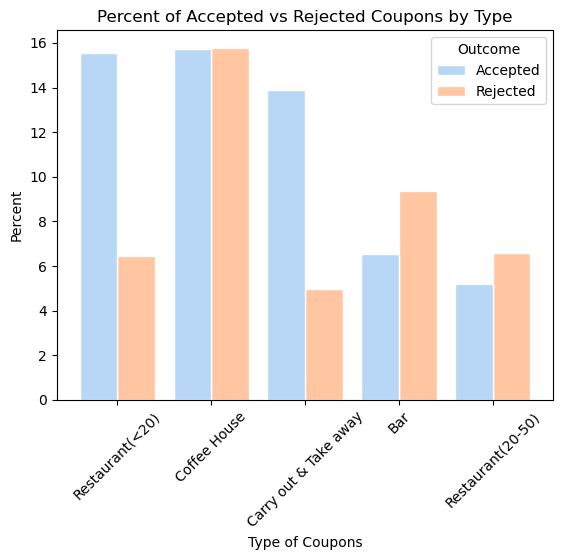

In [16]:
sns.set_palette("pastel")
sns.histplot(data=data, x='coupon', hue='Outcome', multiple="dodge", shrink=.8, stat="percent", edgecolor='white')
plt.xticks(rotation=45)
plt.xlabel('Type of Coupons')
plt.title('Percent of Accepted vs Rejected Coupons by Type')
plt.savefig('images/coupon_pct_by_type')

### Effect of temperature
 - More coupons are accepted when temperature is high
 - Customers are more likely to accept coffee house and restaurant less than $20 when weather is hot
 - Coupons for take away is most popular on cold days

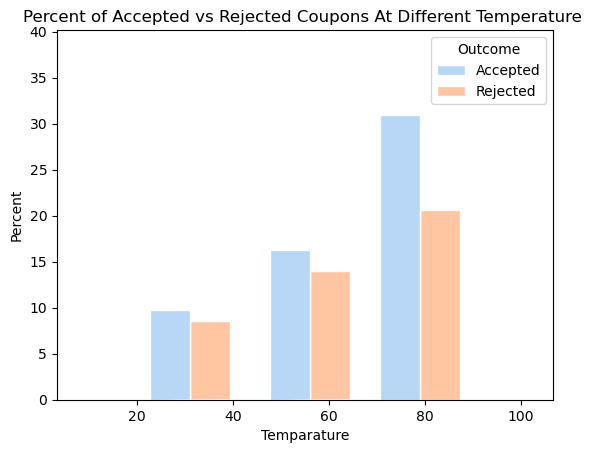

In [17]:
sns.histplot(data=data, x='temperature', hue='Outcome', multiple="dodge", shrink=8, stat="percent", edgecolor='white')
plt.xlabel('Temparature')
plt.margins(0.3)
plt.title('Percent of Accepted vs Rejected Coupons At Different Temperature ')
plt.savefig('images/coupon_pct_by_temp')

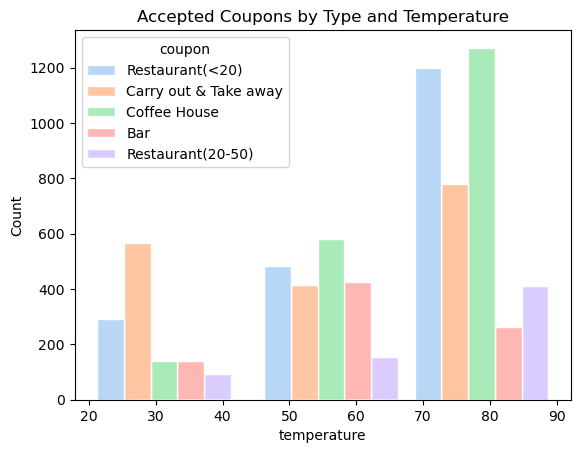

In [49]:
# Filter rows with only accepted coupons
sns.histplot(data=data.query('Outcome == "Accepted"'), x='temperature', hue='coupon', multiple="dodge", shrink=8, edgecolor='white')
plt.title('Accepted Coupons by Type and Temperature')
plt.savefig('images/accepted_coupon_cnt_by_temp')

### Bar coupons summary
2. Overall, 41% of Bar coupon were accepted
3. Acceptance rate is 37% for customers who go to a bar 3 or fewer times a month vs 77% for those who go 4+ times 
4. Acceptance rate is 70% for customers who go to a bar more than once a month and are over 25 vs others 34%
5. Acceptance rate is 71% for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry vs 30% for others 
6. Acceptance rate is 59% for these drivers in any of the listed conditions compared to 30% for other drivers

#### 7. Hypothesis on drivers who accepted bar coupons
Using the overall 41% of acceptance rate for bar coupons as benchmark, any groups that have significant acceptance rate above 41% are more likely to accept the coupons.  

Bar visit frequency is a strongly correlated with coupon acceptance
 - Drivers that goes to bars more than once a month have much higher acceptance rate than benchmark
 - The higher frequency of bar visit, the more likely are coupons accepted


Other factors that has minor positive impact on acceptance rate: 
 - Not having kids as passengers
 - Age between 21 and 30
 - Single people or married without kids as passengers
 - Frequently dine in cheap restaurants and income under 50k


1. Create a new `DataFrame` that contains just the bar coupons.

In [19]:
# Create DataFrame with only bar coupon data
barData = data.query('coupon == "Bar"').copy()

2. What proportion of bar coupons were accepted?
 - 41% of Bar coupon were accepted

In [20]:
barData['Y'].mean()

0.41001487357461575

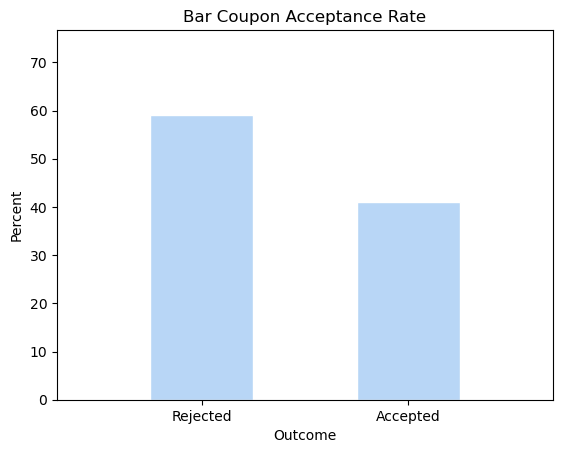

In [21]:
sns.histplot(data=barData['Outcome'], shrink=0.5, edgecolor='white', stat="percent")
plt.margins(0.3)
plt.title('Bar Coupon Acceptance Rate')
plt.savefig('images/bar_coupon_accept_pct')

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
 - Acceptance rate is 37% for customers who go to a bar 3 or fewer times a month vs 77% for those who go 4+ times 


In [22]:
# Use group by to see what values are in 'Bar' column
barData.groupby('Bar')['Y'].mean()

Bar
1~3        0.647355
4~8        0.780000
Unknown    0.380952
gt8        0.734694
less1      0.443860
never      0.187952
Name: Y, dtype: float64

In [23]:
# Use isin() to find rows for drivers who go to a bar fewer than 3 times a month
barData[barData['Bar'].isin(['1~3', 'less1', 'never'])]['Y'].mean()

0.37061769616026713

In [24]:
# Drivers who go to a bar 4 times or more a month
barData[barData['Bar'].isin(['4~8', 'gt8'])]['Y'].mean()

0.7688442211055276

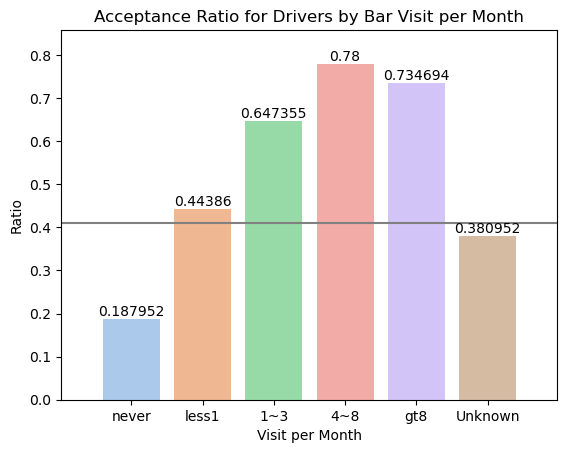

In [25]:
barData['Bar'] = pd.Categorical(barData['Bar'], ['never', 'less1', '1~3', '4~8', 'gt8', 'Unknown'])


ax = sns.barplot(data=barData, x='Bar', y='Y', estimator='mean', errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);
plt.margins(0.1)
ax.set(xlabel='Visit per Month', ylabel='Ratio')
ax.axhline(y = 0.41,  color = "gray")
plt.title('Acceptance Ratio for Drivers by Bar Visit per Month')
plt.savefig('images/coupon_rate_by_bar_freq')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?
 - Acceptance rate is 70% for customers who go to a bar more than once a month and are over 25 vs others 34%

In [26]:
# Goes to a bar more than once a month AND over 25
freq_condition = barData['Bar'].isin(['1~3', '4~8', 'gt8'])
age_condition = ~barData['age'].isin(['21', 'below21'])

# Create the new column 'barMoreThanOnce'
barData['barMoreThanOnceAnd25'] = freq_condition & age_condition


In [27]:
barData.groupby('barMoreThanOnceAnd25')['Y'].mean()

barMoreThanOnceAnd25
False    0.335003
True     0.695238
Name: Y, dtype: float64

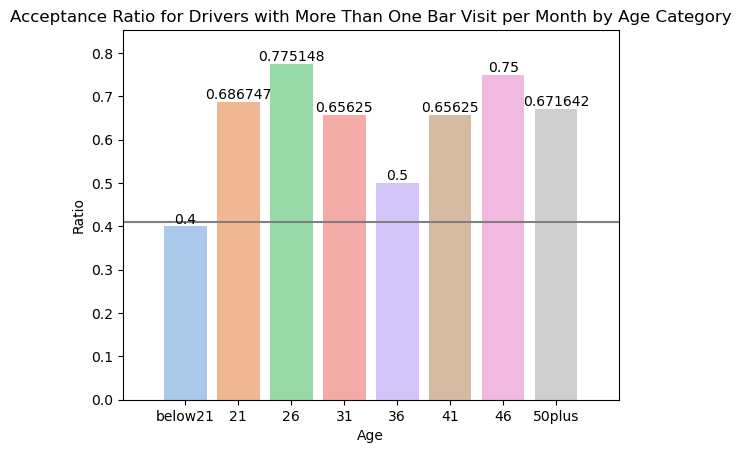

In [28]:
barData['age'] = pd.Categorical(barData['age'], ['below21', '21', '26', '31', '36', '41', '46', '50plus'])

ax = sns.barplot(data=barData[barData['Bar'].isin(['1~3', '4~8', 'gt8'])], x='age', y='Y', estimator='mean', errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);
plt.margins(0.1)
ax.set(xlabel='Age', ylabel='Ratio')
ax.axhline(y = 0.41,  color = "gray")
plt.title('Acceptance Ratio for Drivers with More Than One Bar Visit per Month by Age Category')
plt.savefig('images/coupon_ratio_bargoer_by_age')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

 - Acceptance rate is 71% for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry vs 30% for others 

In [29]:
# drivers who go to bars more than once a month 
freq_condition = barData['Bar'].isin(['1~3', '4~8', 'gt8'])

# had passengers that were not a kid 
passenger_condition = barData['passanger'] != 'Kid(s)'

# had occupations other than farming, fishing, or forestry.
occupation_condition = barData['occupation'] != 'Farming Fishing & Forestry'

# Create the new column 'bar1+WithKidNotFarmFishForestry'
barData['bar1+NoKidNotFarmFishForestry'] = freq_condition & passenger_condition & occupation_condition


In [30]:
barData.groupby('bar1+NoKidNotFarmFishForestry')['Y'].mean()

bar1+NoKidNotFarmFishForestry
False    0.296044
True     0.713249
Name: Y, dtype: float64

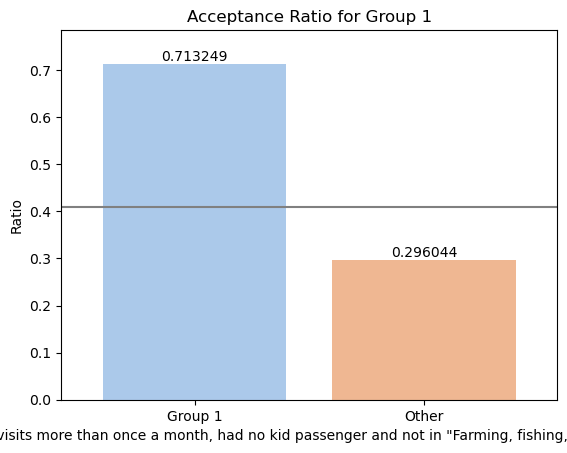

In [31]:
barData['Group1'] = barData['bar1+NoKidNotFarmFishForestry'].map({True: 'Group 1', False: 'Other'})
barData['Group1'] = pd.Categorical(barData['Group1'], ['Group 1', 'Other'])

ax = sns.barplot(data=barData, x='Group1', y='Y', estimator='mean', errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);
plt.margins(0.1)
ax.set(xlabel='Bar visits more than once a month, had no kid passenger and not in "Farming, fishing, or forestry"', ylabel='Ratio')
ax.axhline(y = 0.41,  color = "gray")
plt.title('Acceptance Ratio for Group 1')
plt.savefig('images/bar_coupon_rate_for_group_1')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 

##### Answer
 - Acceptance rate is 59% for these drivers compared to 30% for other drivers

In [32]:
# go to bars more than once a month
barOnePlus = barData['Bar'].isin(['1~3', '4~8', 'gt8'])

# had passengers that were not a kid
NoKidPassenger = barData['passanger'] != 'Kid(s)'

# were not widowed 
NotWidowed = barData['maritalStatus'] != 'Widowed'

# go to bars more than once a month, had passengers that were not a kid, and were not widowed
condition_a = barOnePlus & NoKidPassenger & NotWidowed

# under the age of 30 
under30 = barData['age'].isin(['below21', '21', '26'])

# go to bars more than once a month and are under the age of 30
condition_b = barOnePlus & under30

# go to cheap restaurants more than 4 times a month
FourplusRestLessThan20 = barData['RestaurantLessThan20'].isin(['4~8', 'gt8'])

# income is less than 50K
incomeLessThan50k = barData['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])

# go to cheap restaurants more than 4 times a month and income is less than 50K. 
condition_c = FourplusRestLessThan20 & incomeLessThan50k

# Create a new column, 'targetGroup' representing those in this group
barData['targetGroup'] = condition_a | condition_b | condition_c


In [33]:
barData.groupby('targetGroup')['Y'].mean()

targetGroup
False    0.298147
True     0.588918
Name: Y, dtype: float64

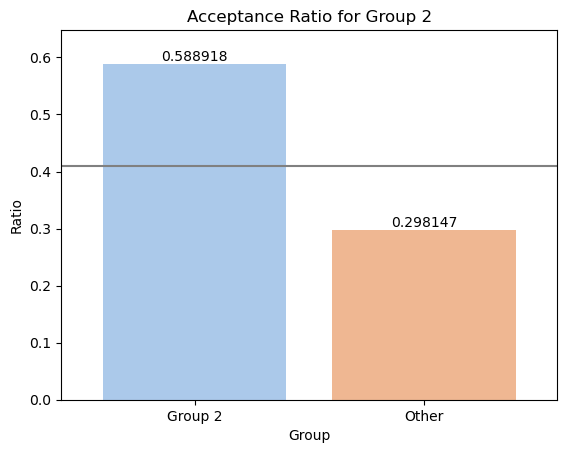

In [34]:
barData['Group2'] = barData['targetGroup'].map({True: 'Group 2', False: 'Other'})
ax = sns.barplot(data=barData, x='Group2', y='Y', estimator='mean', errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);
plt.margins(0.1)
ax.set(xlabel='Group', ylabel='Ratio')
ax.axhline(y = 0.41,  color = "gray")
plt.title('Acceptance Ratio for Group 2')

plt.savefig('images/bar_coupon_rate_for_group_2')

7. Hypothesis on drivers who accepted bar coupons
Using the overall 41% of acceptance rate for bar coupons as benchmark, any groups that have significant acceptance rate above 41% are more likely to accept the coupons.  

Bar visit frequency is a strongly correlated with coupon acceptance
 - Drivers that goes to bars more than once a month have much higher acceptance rate than benchmark
 - The higher frequency of bar visit, the more likely are coupons accepted


Other factors that has minor positive impact on acceptance rate: 
 - Not having kids as passengers
 - Age between 21 and 30
 - Single people or married without kids as passengers
 - Frequently dine in cheap restaurants and income under 50k


# Independent Investigation on Coffee House Coupon


In [35]:
# Create DataFrame with only "Coffee House" coupon data
cafeData = data.query('coupon == "Coffee House"').copy()


## Overall acceptance rate for coffee house
50% of the time drivers accept coffee house coupons

In [36]:
cafeData['Y'].mean()

0.49924924924924924

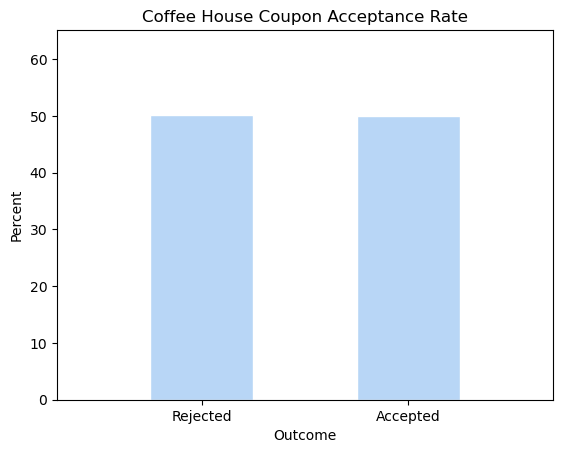

In [37]:
sns.histplot(data=cafeData['Outcome'], shrink=0.5, edgecolor='white', stat="percent")
plt.margins(0.3)
plt.title('Coffee House Coupon Acceptance Rate')

plt.savefig('images/ch_coupon_rate')

## Distance of Coffee House

Coffee house closer to the driver gets better coupon acceptance rate.

| Distance | Coupon <br>Acceptance<br> Rate | 
| :----- | ----------- |
| 5-15 mins away | 0.55 |
| 15-25 mins away | 0.47 |
| 25+ mins away | 0.35 |

### Under what condition would driver willing to go 15+ mins away?
Examine driver destination and coffee house location data

** Coupon acceptance increases to 52% when the coffee house is in the same direction AND when driver is NOT going to work

Compared to 50% acceptance rate not in this context


In [38]:
# Create Distance column based on toCoupon_GEQ15min and toCoupon_GEQ25min flags
def calcDistance(row):
    if row['toCoupon_GEQ25min'] == 1:
        d = '25+ mins away'
    elif row['toCoupon_GEQ15min'] == 1:
        d = '15-25 mins away'
    else:
        d = '5-15 mins away'
        
    return d
cafeData['Distance'] = cafeData.apply(calcDistance, axis=1)

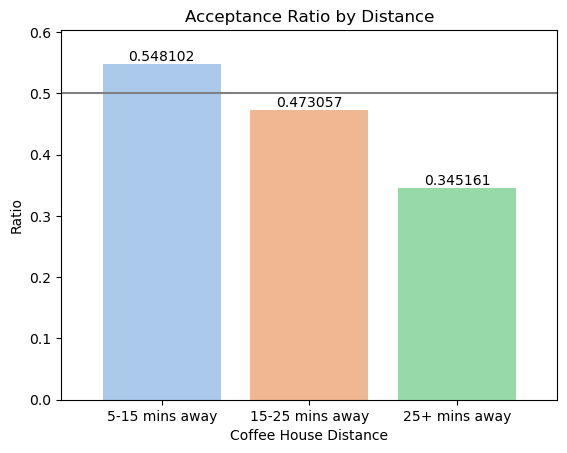

In [39]:
# Order x-axis
cafeData['Distance'] = pd.Categorical(cafeData['Distance'], ['5-15 mins away', '15-25 mins away', '25+ mins away'])

ax = sns.barplot(data=cafeData, x='Distance', y='Y',  estimator='mean', errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);
plt.margins(0.1)
ax.set(xlabel='Coffee House Distance', ylabel='Ratio')
ax.axhline(y = 0.50,  color = "gray")
plt.title('Acceptance Ratio by Distance')

plt.savefig('images/ch_coupon_rate_by_dist')

#### In what condition would drivers be willing to go to a coffee house farther away
Drivers not going to work are more likely to accept coupons for coffee houses farther away if they are in the same direction

In [40]:
# Summary acceptance rate by destination, direction and distance
cafeData.groupby(['destination', 'direction_same', 'Distance'])['Y'].mean()

destination      direction_same  Distance       
Home             0               5-15 mins away     0.353535
                                 15-25 mins away    0.288770
                                 25+ mins away      0.196581
                 1               5-15 mins away     0.466443
                                 15-25 mins away    0.517241
                                 25+ mins away           NaN
No Urgent Place  0               5-15 mins away     0.610415
                                 15-25 mins away    0.553667
                                 25+ mins away           NaN
                 1               5-15 mins away          NaN
                                 15-25 mins away         NaN
                                 25+ mins away           NaN
Work             0               5-15 mins away          NaN
                                 15-25 mins away    0.265993
                                 25+ mins away      0.435233
                 1               5-1

In [41]:
# Coffee house more than 15 mins
dist_condition = cafeData['Distance'] == '15-25 mins away'

# Going the same direction
same_direction_condition = cafeData['direction_same'] == 1

# Not going to work
destination_condition = cafeData['destination'] != 'Work'

# Create the new column 'bar1+WithKidNotFarmFishForestry'
cafeData['15minSameDirNotWork'] = dist_condition & same_direction_condition & destination_condition

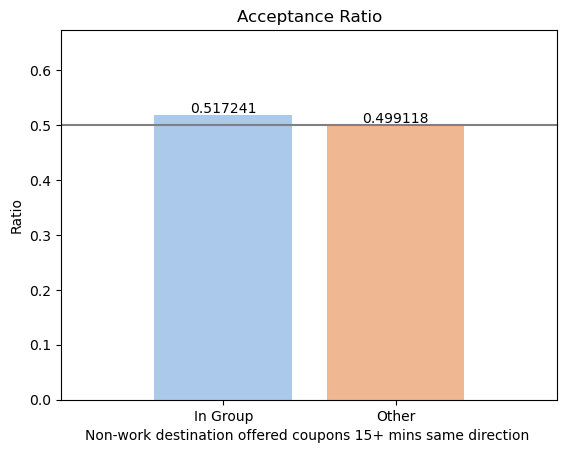

In [42]:
# Create column with text values
cafeData['15minSameDirNotWorkLabel'] = cafeData['15minSameDirNotWork'].map({True: 'In Group', False: 'Other'})
cafeData['15minSameDirNotWorkLabel'] = pd.Categorical(cafeData['15minSameDirNotWorkLabel'], ['In Group', 'Other'])

ax = sns.barplot(data=cafeData, x='15minSameDirNotWorkLabel', y='Y', estimator='mean', errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);
plt.margins(0.3)
ax.set(xlabel='Non-work destination offered coupons 15+ mins same direction ', ylabel='Ratio')
ax.axhline(y = 0.50,  color = "gray")
plt.title('Acceptance Ratio')


plt.savefig('images/ch_coupon_rate_far_same_dir_not_work')

#### 
## Time When Coffee House Coupon is Offered

Coupons offered in the evening or at night have low acceptance rate

| Time | Coupon <br>Acceptance<br> Rate | 
| :----- | ----------- |
| 7 am | 0.45 |
| 10 am | 0.64 |
| 2 pm | 0.55 |
| 6 pm | 0.41 |
| 10 pm | 0.42 |


### What can increase accept evening and late night coupons?
Examine how often driver goes to coffee house and the expiry of coupons

** Coupon acceptance increases to 71% for users who goes to coffee houses more than once a month and if coupon expiry is 1 day instead of 2 hours

Compared to 48% acceptance for coupons offered not under the same condition

In [43]:
# Order x-axis by time of day
cafeData['time'] = pd.Categorical(cafeData['time'], ['7AM', '10AM', '2PM', '6PM', '10PM'])

# Occupation by acceptance rate 
cafeData.groupby('time')['Y'].mean()

time
7AM     0.445783
10AM    0.640712
2PM     0.547859
6PM     0.412626
10PM    0.424242
Name: Y, dtype: float64

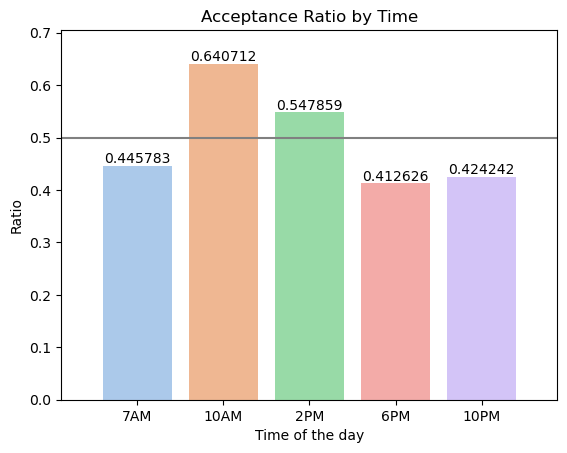

In [44]:
ax = sns.barplot(data=cafeData, x='time', y='Y',  estimator='mean', errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);
plt.margins(0.1)
ax.set(xlabel='Time of the day', ylabel='Ratio')
ax.axhline(y = 0.50,  color = "gray")
plt.title('Acceptance Ratio by Time')

plt.savefig('images/ch_coupon_rate_by_time')

In [45]:
# 6PM and after
time_condition = cafeData['time'].isin(['6PM', '10PM'])

# Goes to coffee house more than once a month
freq_condition = cafeData['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])

# Coupon expiration is 1d
expiry_condition = cafeData['expiration'] == '1d'

# Create the new column coffeeOneExp1dLate
cafeData['coffeeOneExp1dLate'] = time_condition & freq_condition & expiry_condition

In [46]:
cafeData.groupby('coffeeOneExp1dLate')['Y'].mean()

coffeeOneExp1dLate
False    0.481381
True     0.706625
Name: Y, dtype: float64

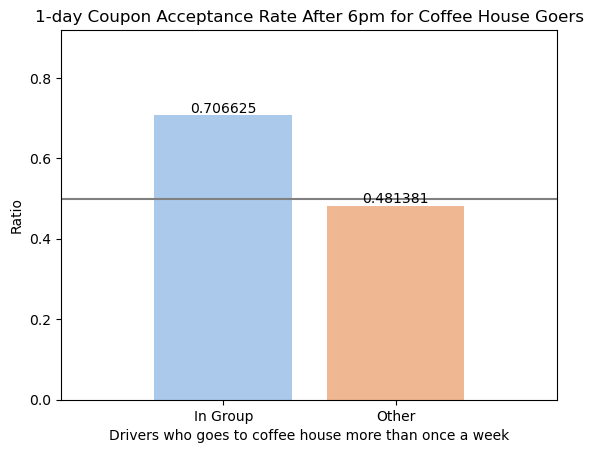

In [47]:
# Create column with text values
cafeData['coffeeOneExp1dLateGroup'] = cafeData['coffeeOneExp1dLate'].map({True: 'In Group', False: 'Other'})
cafeData['coffeeOneExp1dLateGroup'] = pd.Categorical(cafeData['coffeeOneExp1dLateGroup'], ['In Group', 'Other'])

ax = sns.barplot(data=cafeData, x='coffeeOneExp1dLateGroup', y='Y', estimator='mean', errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);
plt.margins(0.3)
ax.set(xlabel='Drivers who goes to coffee house more than once a week', ylabel='Ratio')
ax.axhline(y = 0.50,  color = "gray")
plt.title('1-day Coupon Acceptance Rate After 6pm for Coffee House Goers')

plt.savefig('images/ch_coupon_late_1D_cafegoer')